Step-1 

Data Exploration

Importing libraries and the data set:
1. Numpy
2. Pandas
3. Matplotlib
4. Seaborn

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

Read csv file from the location('/home/sengar/Documents/Big Data and hadoop training/classroom folder/New folder/project/Loan Prediction Project/train_data.csv')

In [2]:
data=pd.read_csv('/home/sengar/Documents/Big Data and hadoop training/classroom folder/New folder/project/Loan Prediction Project/train_data.csv')

In [3]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


you can look at summary of numerical fields by using describe() function...

In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


    describe() function would provide count, mean, standard deviation (std), min, quartiles and max in its output.
    Here are a few inferences, you can draw by looking at the output of describe() function:
    1. LoanAmount has (614 – 592) 22 missing values.
    2. Loan_Amount_Term has (614 – 600) 14 missing values.
    3. Credit_History has (614 – 564) 50 missing values.
    4. We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84             (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)
    5. The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


Step-2 

Data Preparation-
    Means that Data is selected, cleaned, and integrated in the format finalized for the analysis in this phase

Using heatmap is used to explore the data in one content

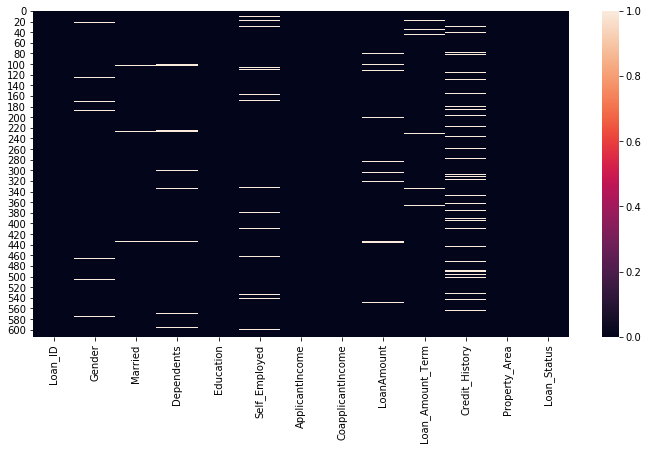

In [6]:
plt.figure(figsize=[12,6])
sns.heatmap(data.isnull())

In [7]:
#explore the null value

In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data['Credit_History'].dtype

dtype('float64')

In [10]:
data['LoanAmount'].dtype

dtype('float64')

In [11]:
data['Gender'].dtype

dtype('O')

In [12]:
data['Married'].dtype

dtype('O')

In [13]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [14]:
data['Married'].fillna('yes',inplace=True)

In [15]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [16]:
data['Gender'].fillna('Male',inplace=True)

In [17]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [18]:
data['Dependents'].dtype

dtype('O')

In [19]:
data['Dependents'].fillna('0',inplace=True)

In [20]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [21]:
data['Self_Employed'].fillna('No',inplace=True)

In [22]:
data['LoanAmount'].value_counts().head()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
Name: LoanAmount, dtype: int64

In [23]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [24]:
data['Loan_Amount_Term'].value_counts().head()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
Name: Loan_Amount_Term, dtype: int64

In [25]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True)

In [26]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [27]:
data['Credit_History'].dtype

dtype('float64')

In [28]:
data['Credit_History'].fillna(data['Credit_History'].mean(),inplace=True)

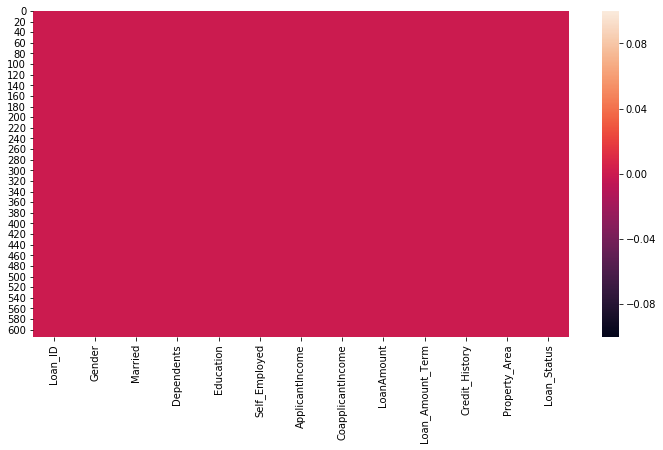

In [29]:
plt.figure(figsize=[12,6])
sns.heatmap(data.isnull())

In [30]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Step -3

Data Modeling-
    Data model is build to analyze relationships between various selected objects in the data, test cases are built for assessing the model and model is tested and implemented on the data in this phase.

    1. Distribution analysis-
        Now that we are familiar with basic data characteristics, let us study distribution of various variables. Let us start with numeric variables – namely ApplicantIncome and LoanAmount

In [31]:
#data=data.pivot('ApplicantIncome','Credit_History','LoanAmount')

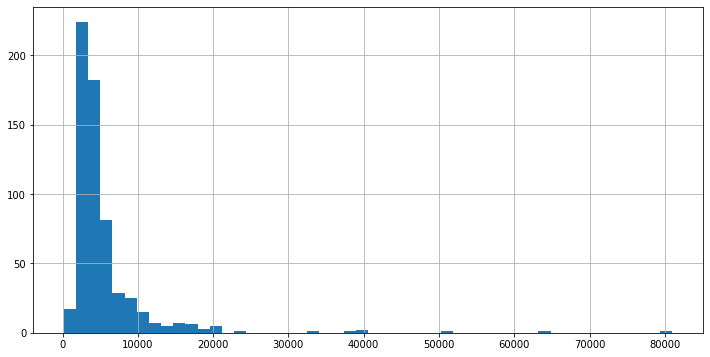

In [32]:
plt.figure(figsize=[12,6])
#plt.x_label('Applicant Income in Thousand')
data['ApplicantIncome'].hist(bins=50)

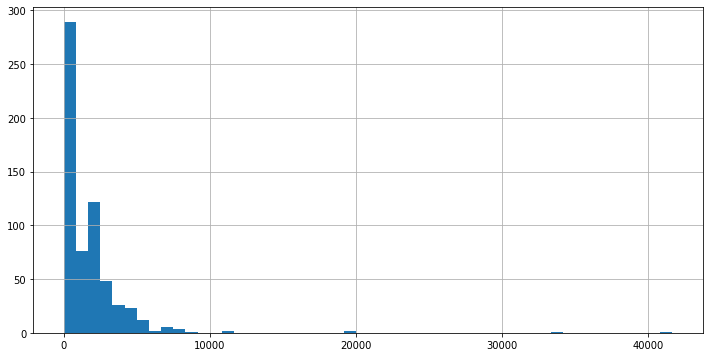

In [33]:
plt.figure(figsize=[12,6])
data['CoapplicantIncome'].hist(bins=50)

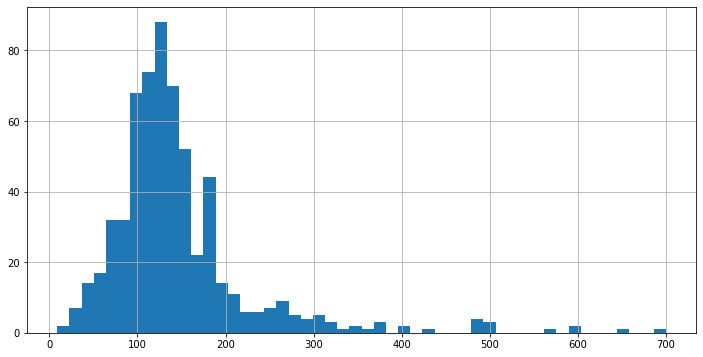

In [34]:
plt.figure(figsize=[12,6])
data['LoanAmount'].hist(bins=50)

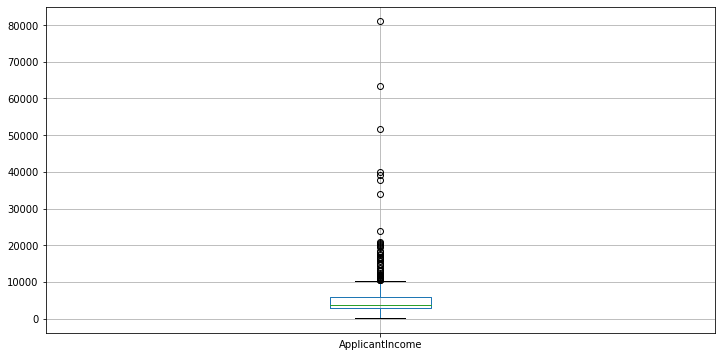

In [35]:
plt.figure(figsize=[12,6])
data.boxplot(column='ApplicantIncome')

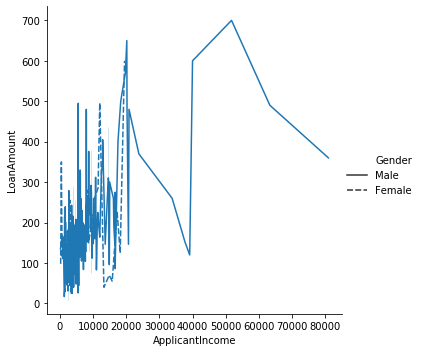

In [36]:

sns.relplot(x = 'ApplicantIncome', y = 'LoanAmount',style = 'Gender', kind = 'line', data = data)

<Figure size 864x432 with 0 Axes>

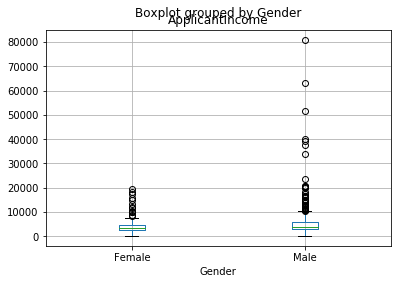

In [37]:
plt.figure(figsize=[12,6])
data.boxplot(column='ApplicantIncome',by='Gender')

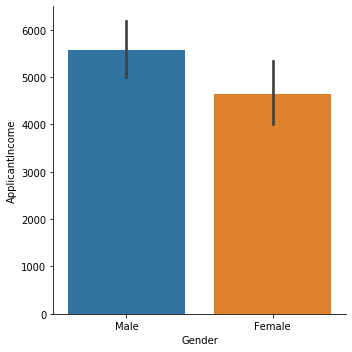

In [38]:
sns.catplot(x='Gender',y='ApplicantIncome',data=data,kind='bar')

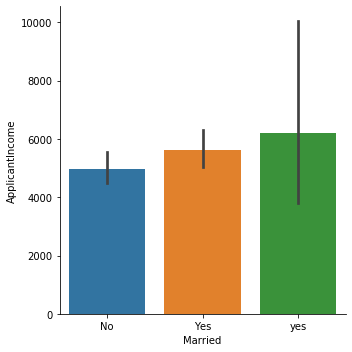

In [39]:
sns.catplot(x='Married',y='ApplicantIncome',data=data,kind='bar')

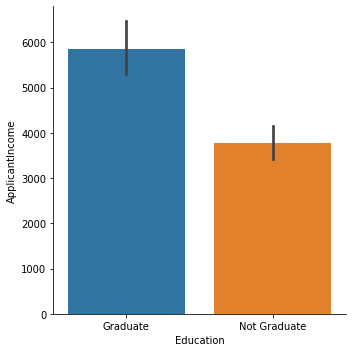

In [40]:
sns.catplot(x='Education',y='ApplicantIncome',data=data,kind='bar')

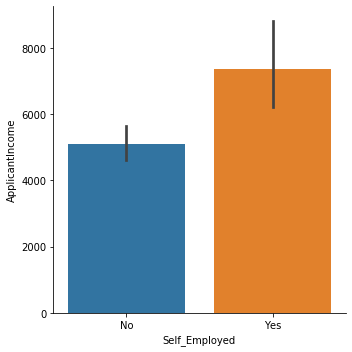

In [41]:
sns.catplot(x='Self_Employed',y='ApplicantIncome',data=data,kind='bar')

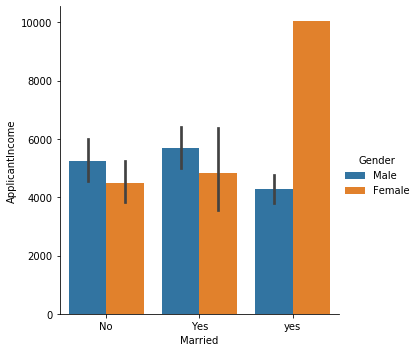

In [42]:
sns.catplot(y='ApplicantIncome',x='Married',hue='Gender',data=data,kind='bar')

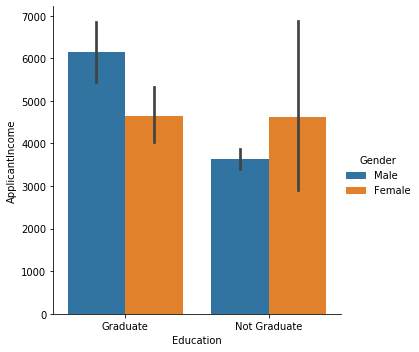

In [43]:
sns.catplot(x='Education',y='ApplicantIncome',hue='Gender',data=data,kind='bar')

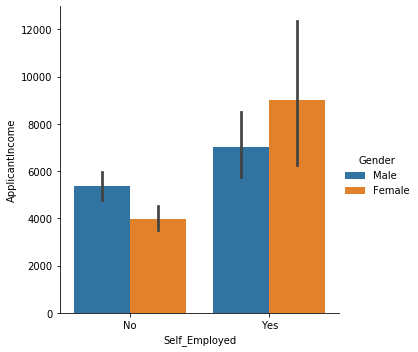

In [44]:
sns.catplot(x='Self_Employed',y='ApplicantIncome',hue='Gender',data=data,kind='bar')

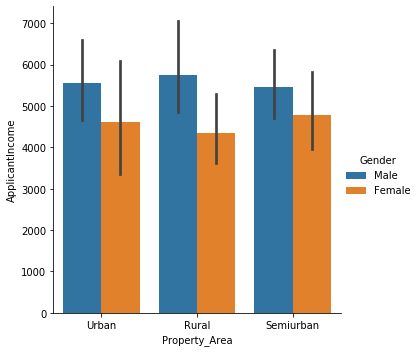

In [45]:
sns.catplot(x='Property_Area',y='ApplicantIncome',hue='Gender',data=data,kind='bar')

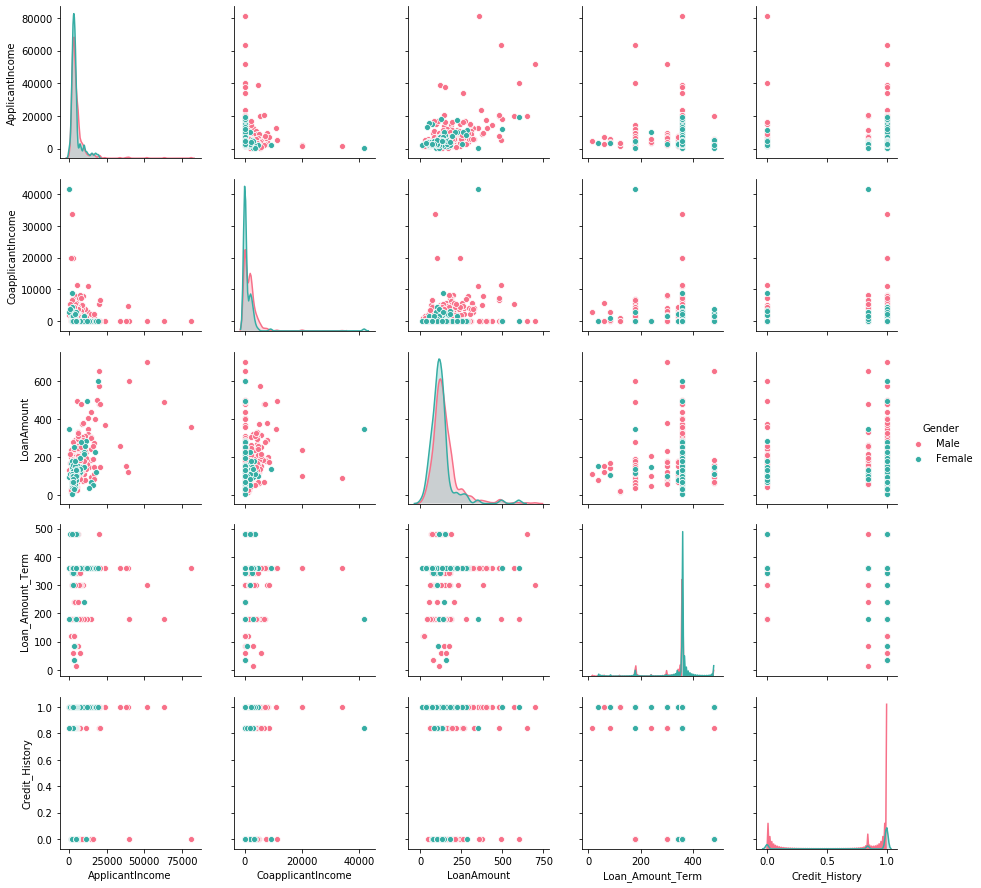

In [46]:
sns.pairplot(data,palette='husl',hue='Gender')

Step-4 

Building a Predictive Model in Python-
    After, we have made the data useful for modeling, let’s now look at the python code to create a predictive model on our data set. Skicit-Learn (sklearn) is the most commonly used library in Python for this purpose and we will follow the trail.
Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories.

In [47]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
x=data.drop(['Loan_ID','Loan_Status'],axis=1)

In [49]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban


In [50]:
y=data['Loan_Status']
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [51]:
x=pd.get_dummies(x)

In [52]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Married_yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1


In [53]:
import sklearn.model_selection as model_selection

In [54]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.1,random_state=200)

1. LogisticRegression model-

    Regression analysis is a form of predictive modeling technique which investigates the relationship between a dependent and independent variable.
    logistic regression produce the result in a binary format which is used to predict the outcome of a categorical dependent variable.So the outcome should be discrete/categorical(yes or no ,0 or 1,high or low).

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
model=LogisticRegression()

In [57]:
model.fit(x_train,y_train)

/home/sengar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
print(x_train.shape)
print(x_test.shape)

(552, 21)
(62, 21)


In [59]:
model.score(x_test,y_test)

0.8225806451612904

In [60]:
prediction= model.predict(x_test)
prediction

array(['Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N'], dtype=object)

In [61]:
from sklearn import metrics

In [62]:
metrics.classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           N       0.67      0.53      0.59        15\n           Y       0.86      0.91      0.89        47\n\n    accuracy                           0.82        62\n   macro avg       0.76      0.72      0.74        62\nweighted avg       0.81      0.82      0.82        62\n'

In [63]:
metrics.confusion_matrix(y_test,prediction)

array([[ 8,  7],
       [ 4, 43]])

In [64]:
metrics.accuracy_score(y_test,prediction)*100

82.25806451612904

2. DecisionTree Classification-

    Decision tree is another method for making a predictive model. It is known to provide higher accuracy than logistic regression model

In [65]:
import sklearn.model_selection as model_selection

In [66]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.1,random_state=200)

In [67]:
import sklearn.tree as tree

In [68]:
clf=tree.DecisionTreeClassifier(max_depth=5,random_state=200)
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=200, splitter='best')

In [69]:
clf.score(x_test,y_test)

0.8225806451612904

3. Rondomforest-
    
    Random forest is another algorithm for solving the classification problem.
An advantage with Random Forest is that we can make it work with all the features and it returns a feature importance matrix which can be used to select features.

In [70]:
import sklearn.model_selection as model_selection

In [71]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.1,random_state=300)

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
model= RandomForestClassifier()

In [74]:
model.fit(x_train, y_train)

/home/sengar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
model.score(x_test,y_test)

0.8548387096774194

In [76]:
predicted= model.predict(x_test)
predicted

array(['N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N'], dtype=object)

4. K-Fold cross validation-

    1. That k-fold cross validation is a procedure used to estimate the skill of the model on new data
    2. There are common tactics that you can use to select the value of k for your dataset.
    3. There are commonly used variations on cross-validation such as stratified and repeated that are available in scikit-learn.

In [77]:
from sklearn.model_selection import KFold

In [78]:
kf=KFold(n_splits=4)
kf

KFold(n_splits=4, random_state=None, shuffle=False)

In [79]:
for train_index,test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index,test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 5 6 7 8] [3 4]
[0 1 2 3 4 7 8] [5 6]
[0 1 2 3 4 5 6] [7 8]


In [80]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [81]:
get_score(LogisticRegression(),x_train,x_test,y_train,y_test)

/home/sengar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8548387096774194

In [82]:
get_score(RandomForestClassifier(),x_train,x_test,y_train,y_test)

/home/sengar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8225806451612904